# Mutual Information

MI measures how much information the presence or absence of a feature contributes to making the correct prediction of the target.

Let's build MI on a regression and classification problems, with Paribas and House Price datasets respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

## MI for Classification

In [5]:
paribas = pd.read_csv('../datasets/paribas.csv', nrows=5000)
paribas.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

paribas_numeric = paribas.select_dtypes(include=numerics)
paribas_numeric.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


Before doing anything, let's first split the dataset and examine only the training subset.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    paribas_numeric.drop(labels=['target', 'ID'], axis=1),
    paribas_numeric['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((3500, 112), (1500, 112))

Calculate the mutual information between the variables and the target. This returns the MI value for each feature; the smaller the value the less information the feature has about the target.

In [11]:
mi = mutual_info_classif(X_train.fillna(0), y_train)

In [12]:
mi

array([0.        , 0.0074341 , 0.        , 0.00171164, 0.01093064,
       0.        , 0.00413562, 0.        , 0.02223893, 0.        ,
       0.00474648, 0.        , 0.0235652 , 0.00154242, 0.00487581,
       0.        , 0.00308675, 0.00752189, 0.        , 0.02069479,
       0.00340308, 0.01713215, 0.        , 0.        , 0.        ,
       0.01092014, 0.        , 0.01000393, 0.00086209, 0.        ,
       0.00493953, 0.00598267, 0.        , 0.        , 0.00559449,
       0.        , 0.00402854, 0.00398141, 0.00282388, 0.        ,
       0.        , 0.        , 0.01075231, 0.05810848, 0.        ,
       0.01002313, 0.        , 0.00179049, 0.00112271, 0.00813195,
       0.00911126, 0.        , 0.        , 0.02783623, 0.        ,
       0.00413855, 0.        , 0.        , 0.00290756, 0.00341604,
       0.00650918, 0.00163226, 0.00133268, 0.        , 0.        ,
       0.00612647, 0.        , 0.005482  , 0.01366627, 0.00165543,
       0.00016113, 0.0015781 , 0.        , 0.        , 0.     

In [13]:
series_mi = pd.Series(mi)
series_mi.index = X_train.columns
series_mi.sort_values(ascending=False)

v50     0.058108
v62     0.027836
v14     0.023565
v10     0.022239
v21     0.020695
v25     0.017132
v118    0.015257
v100    0.015094
v82     0.013666
v6      0.010931
v29     0.010920
v49     0.010752
v53     0.010023
v33     0.010004
v109    0.009687
v59     0.009111
v58     0.008132
v19     0.007522
v2      0.007434
v129    0.007173
v106    0.006877
v70     0.006509
v103    0.006445
v78     0.006126
v37     0.005983
v108    0.005736
v40     0.005594
v81     0.005482
v116    0.005070
v36     0.004940
          ...   
v41     0.000000
v35     0.000000
v60     0.000000
v86     0.000000
v87     0.000000
v80     0.000000
v88     0.000000
v77     0.000000
v76     0.000000
v89     0.000000
v67     0.000000
v65     0.000000
v130    0.000000
v63     0.000000
v61     0.000000
v92     0.000000
v104    0.000000
v54     0.000000
v95     0.000000
v51     0.000000
v96     0.000000
v97     0.000000
v48     0.000000
v46     0.000000
v45     0.000000
v99     0.000000
v101    0.000000
v39     0.0000

Let's plot it to see MI by feature

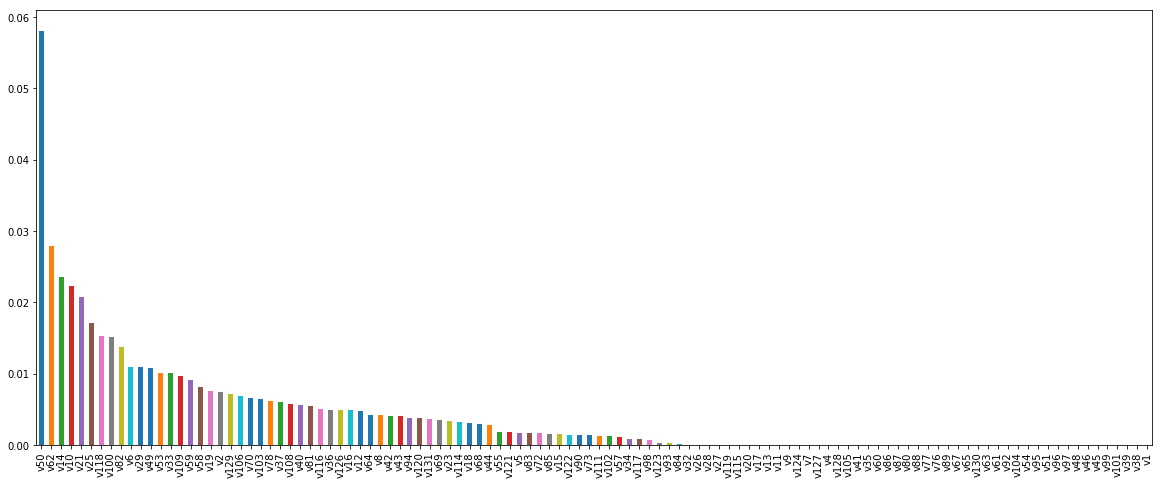

In [14]:
series_mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

Comparatively, we can see that there are a few features on the left that seem to contribute the most to predicting the target. There are also a few features on the right with almost zero MI values on the right of the plot.

Where to put the cut-off to select features is arbitrary. One could choose the top 10, or the top 10th percentile of the MI distribution.

To do this, we can use mutual info in combination of SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many values, whereas SelectPercentile allows you to determine the percentile threshold.

In [15]:
sel_kbest = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_kbest.get_support()]

Index(['v10', 'v14', 'v21', 'v25', 'v33', 'v50', 'v53', 'v82', 'v117', 'v124'], dtype='object')

In [16]:
sel_percentile = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_kbest.get_support()]

Index(['v10', 'v14', 'v21', 'v25', 'v33', 'v50', 'v53', 'v82', 'v117', 'v124'], dtype='object')

## MI for Regression

In [17]:
houseprice = pd.read_csv('../datasets/houseprice.csv')
houseprice.shape

(1460, 81)

In practice, feature selection should be done after preprocessing, so ideally all the categorical values must be encoded into numbers.

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

houseprice_numeric = houseprice.select_dtypes(include=numerics)
houseprice_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    houseprice_numeric.drop(labels=['SalePrice'], axis=1),
    houseprice_numeric['SalePrice'],
    test_size=0.3,
    random_state=0
    )
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [22]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
series_mi = pd.Series(mi)
series_mi.index = X_train.columns
series_mi.sort_values(ascending=False)

/home/alvaro/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


OverallQual      0.525931
GrLivArea        0.481468
GarageCars       0.384747
TotalBsmtSF      0.383015
GarageArea       0.373144
YearBuilt        0.354278
1stFlrSF         0.313134
GarageYrBlt      0.270964
FullBath         0.267095
MSSubClass       0.247768
YearRemodAdd     0.239985
2ndFlrSF         0.227215
LotFrontage      0.222131
TotRmsAbvGrd     0.189938
Fireplaces       0.175159
OpenPorchSF      0.174176
LotArea          0.167617
BsmtFinSF1       0.163411
BsmtUnfSF        0.111165
MasVnrArea       0.107010
OverallCond      0.105864
HalfBath         0.083997
WoodDeckSF       0.066950
BsmtFullBath     0.032753
BedroomAbvGr     0.030202
ScreenPorch      0.026045
YrSold           0.011484
BsmtFinSF2       0.007520
EnclosedPorch    0.003689
3SsnPorch        0.002602
KitchenAbvGr     0.000671
BsmtHalfBath     0.000270
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

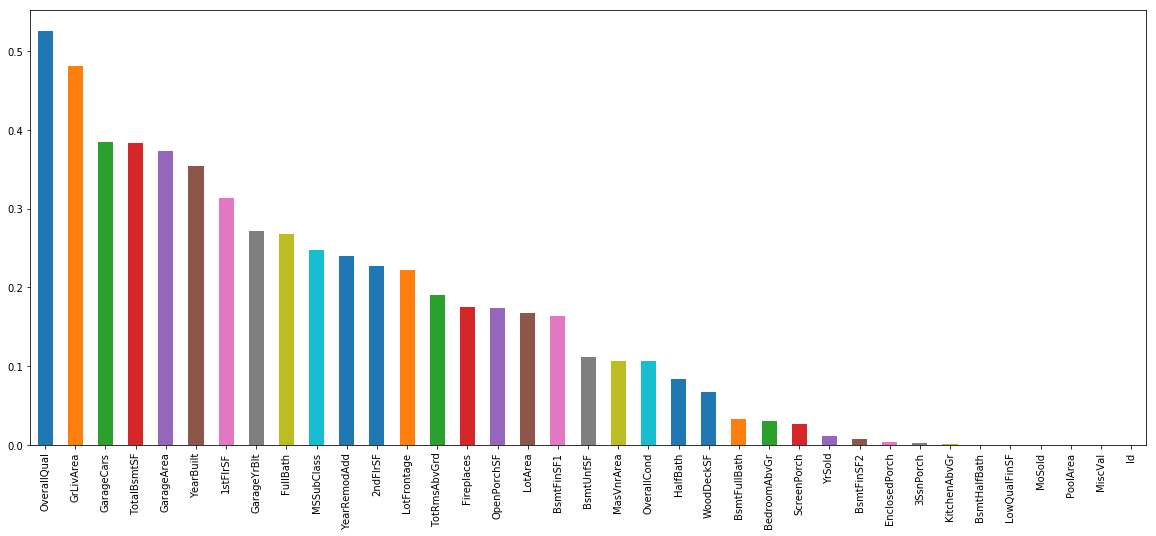

In [23]:
series_mi.sort_values(ascending=False).plot.bar(figsize=(20,8));

In [24]:
sel_kbest = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_kbest.get_support()]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'],
      dtype='object')

In [25]:
sel_percentile = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_kbest.get_support()]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'],
      dtype='object')